# 0. 기본 정보
- 코드 작성자: 여서연
- 코드 작성일: 2024-09-23 ~ 2024-09-24
- 데이터 분석 목적: 데이터 분포 시각화
- 데이터 출처: [The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv)

## 사용 라이브러리

In [64]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [65]:
import warnings
warnings.filterwarnings('ignore')

## 기타 설정

In [66]:
# 열 중간 잘리지 않게 설정
pd.set_option('display.max_columns', None)

# 1. 데이터 불러오기

In [67]:
mvmd_origin = pd.read_csv('../data/movies_metadata.csv')
mvmd_cleaned = pd.read_csv('../data/final_data.csv').iloc[:,1:]

In [68]:
mvmd_origin.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [69]:
mvmd_cleaned.head()

,movieId,imdbId,tmdbId,release_date,runtime,production_companies,genres,vote_average,runtime_bins,release_year,release_year_bins,title,vote_count
0,1,114709,862,1995-10-30,81.0,Pixar Animation Studios,"Animation, Comedy, Family",7.7,60-90,1995,1981-2000,Toy Story,5415.0
1,2,113497,8844,1995-12-15,104.0,"TriStar Pictures, Teitler Film, Interscope Com...","Adventure, Fantasy, Family",6.9,90-120,1995,1981-2000,Jumanji,2413.0
2,3,113228,15602,1995-12-22,101.0,"Warner Bros., Lancaster Gate","Romance, Comedy",6.5,90-120,1995,1981-2000,Grumpier Old Men,92.0
3,4,114885,31357,1995-12-22,127.0,Twentieth Century Fox Film Corporation,"Comedy, Drama, Romance",6.1,120-150,1995,1981-2000,Waiting to Exhale,34.0
4,5,113041,11862,1995-02-10,106.0,"Sandollar Productions, Touchstone Pictures",Comedy,5.7,90-120,1995,1981-2000,Father of the Bride Part II,173.0


# 2. 시각화

In [70]:
mvmd = mvmd_origin.copy()

In [71]:
# 문제가 있는 행 제거 (밀려 쓴 데이터)
mvmd = mvmd.drop([19730, 29503, 35587])
mvmd = mvmd.reset_index(drop=True)

In [72]:
# 특정 col의 json 형태 값을 원하는 val 값으로 저장
import ast

def ExtractValues(df, col, val):
    # JSON 문자열을 딕셔너리로 변환
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

    # 특정 키의 값 추출
    df[col] = df[col].apply(lambda x: [i[val] for i in x] if isinstance(x, list) else [])

    # 리스트를 문자열로 변환
    df[col] = df[col].apply(lambda y: ', '.join(y) if isinstance(y, list) else '')

In [73]:
def DistributionTopN(df, column, top_n=10):
    # 상위 N개의 값 추출
    category_counts = df[column].value_counts().nlargest(top_n)

    # 시각화
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

    plt.title(f'Top {top_n} Distribution of {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=90)  # 범주형 값이 많을 경우 기울여서 표시
    plt.show()

In [74]:
def PiePlotTopN(df, column, top_n=10):
    # 상위 N개의 값 추출
    category_counts = df[column].value_counts().nlargest(top_n)

    # 시각화
    plt.figure(figsize=(8, 8))
    plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(category_counts)))

    plt.title(f'Top {top_n} {column} Distribution', fontsize=15)
    plt.show()

## 결측치 처리 전
---
결측치 정제가 필요한 경우 결측 값을 삭제하여 시각화

In [75]:
for col in list(mvmd.columns):
    mvmd[col] = mvmd[col].replace(0, np.nan)
    mvmd[col] = mvmd[col].replace('[]', np.nan)

### `belongs_to_collection`

In [76]:
df = mvmd.copy()
df = df.dropna(subset='belongs_to_collection')
df = df.reset_index(drop=True)

In [77]:
df['belongs_to_collection'] = df['belongs_to_collection'].apply(ast.literal_eval)
df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: x.get('name', None))

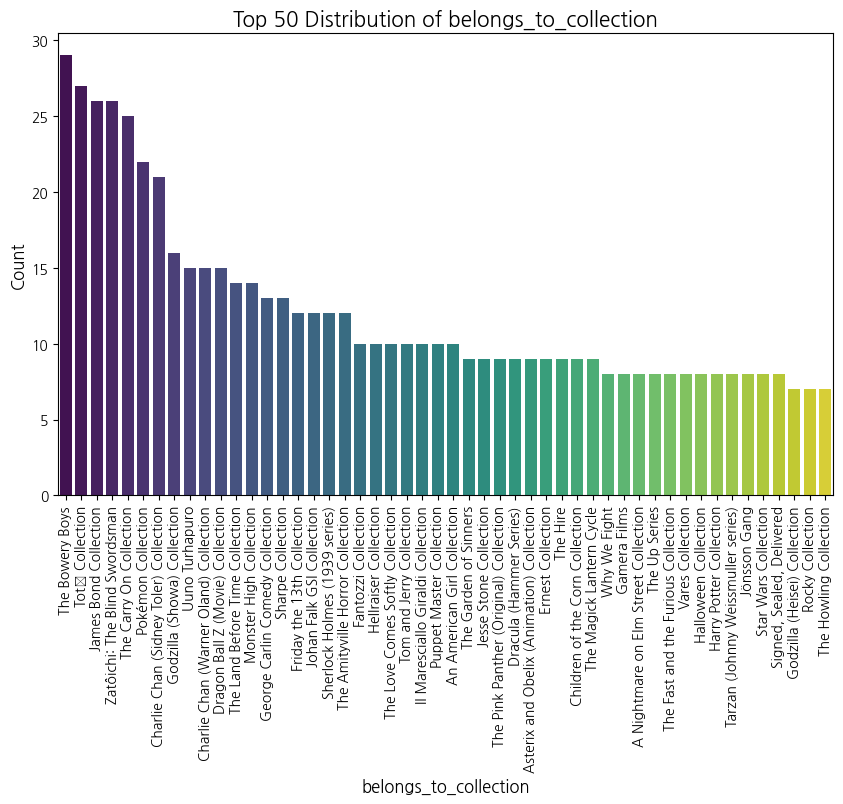

In [78]:
DistributionTopN(df,'belongs_to_collection',50)

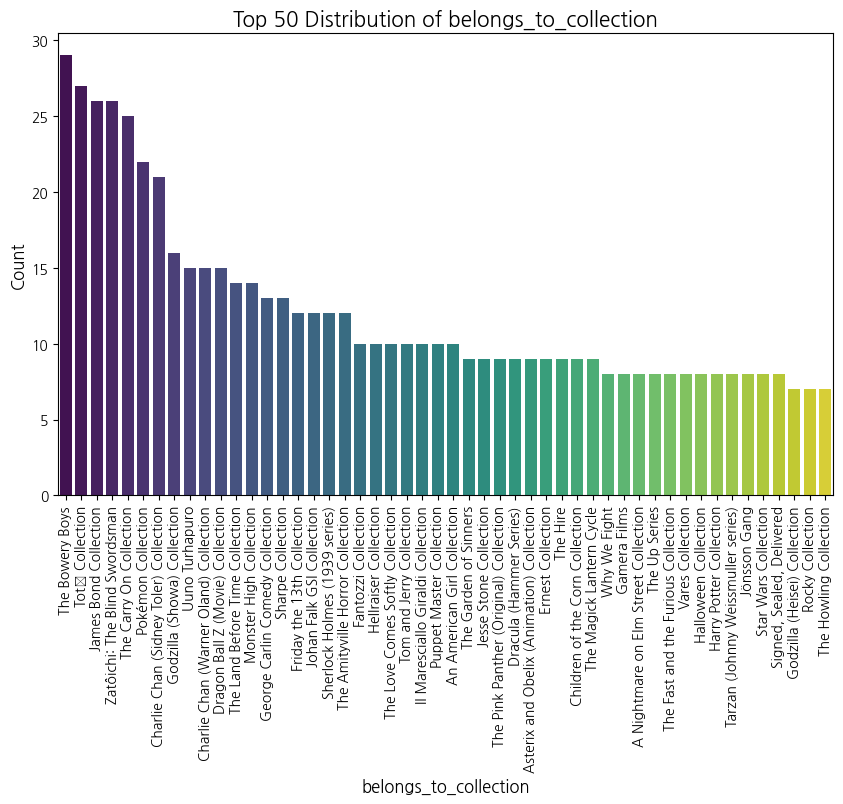

In [ ]:
PiePlotTopN(df,'belongs_to_collection',50)

### `genres`

In [79]:
df = mvmd.copy()
df = df.dropna(subset='genres')
df = df.reset_index(drop=True)

In [80]:
ExtractValues(df,'genres','name')

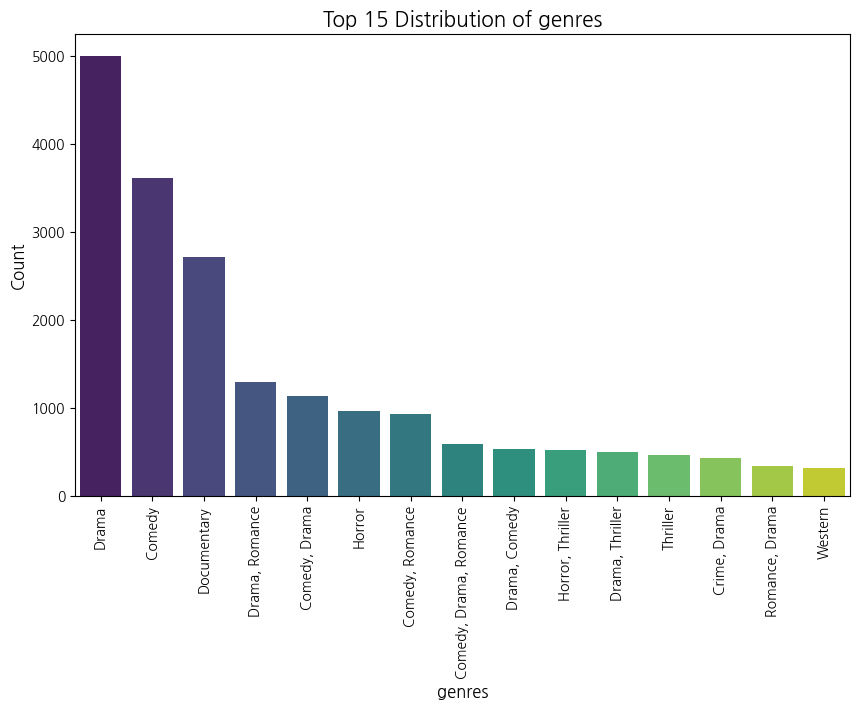

In [81]:
DistributionTopN(df,'genres',15)

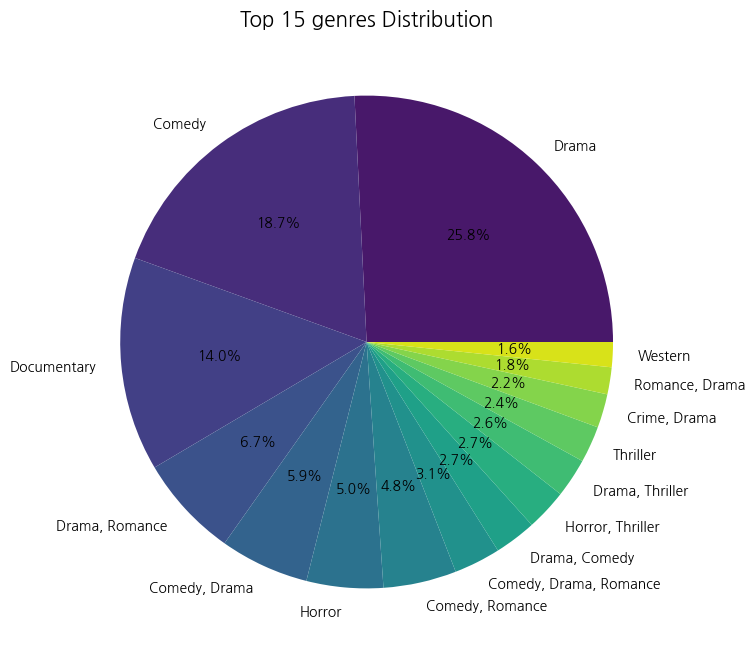

In [82]:
PiePlotTopN(df,'genres',15)

### `production_companies`

In [83]:
df = mvmd.copy()
df = df.dropna(subset='production_companies')
df = df.reset_index(drop=True)

In [85]:
ExtractValues(df,'production_companies','name')

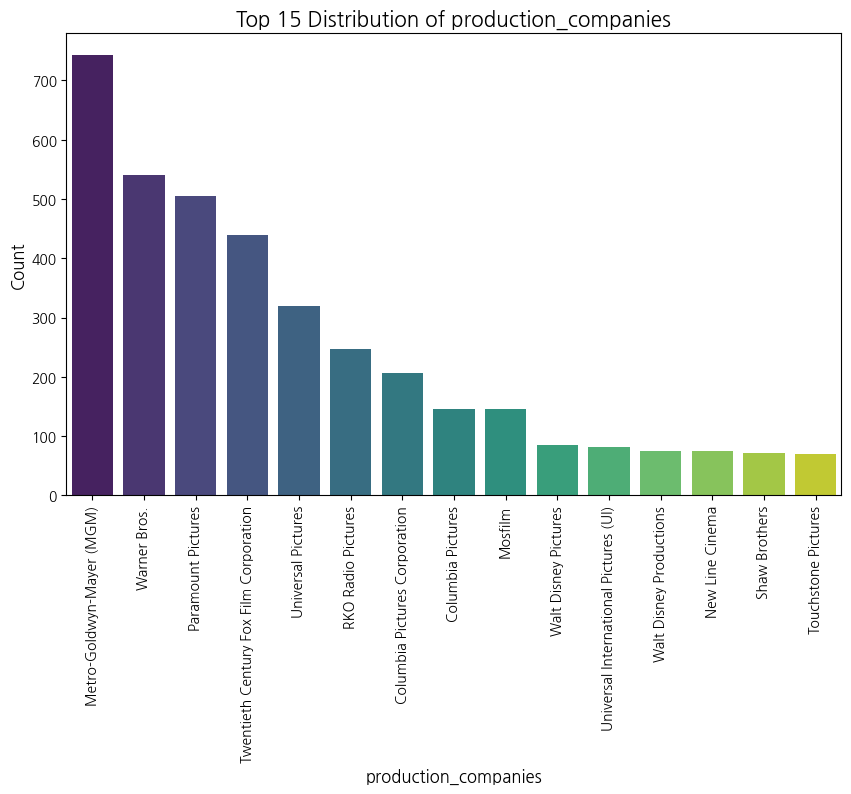

In [86]:
DistributionTopN(df,'production_companies',15)

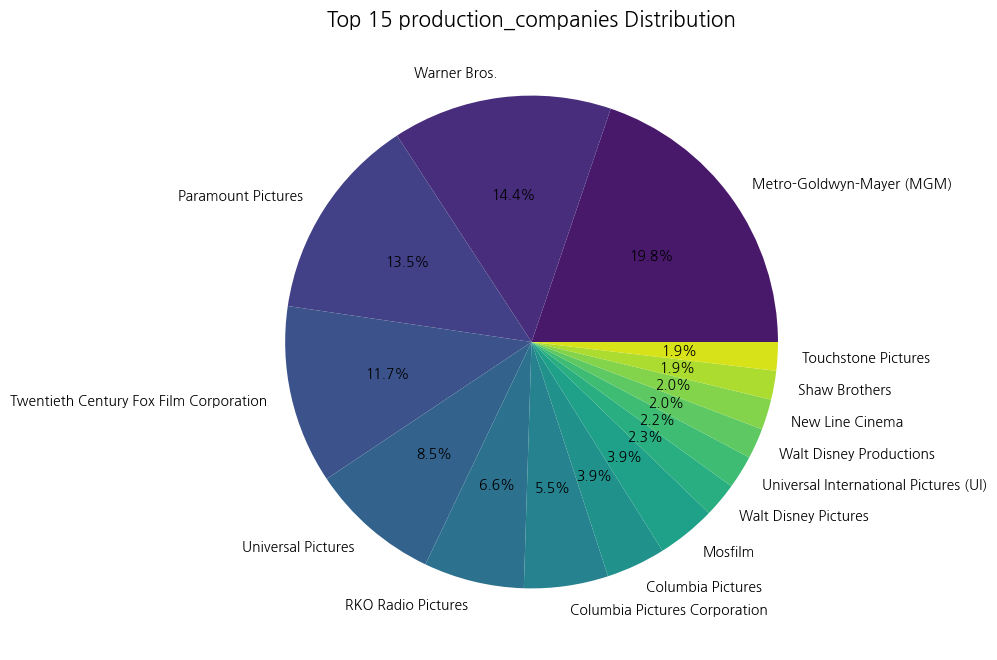

In [88]:
PiePlotTopN(df,'production_companies',15)

### `release_date`

In [89]:
df = mvmd.copy()
df = df.dropna(subset='release_date')
df = df.reset_index(drop=True)

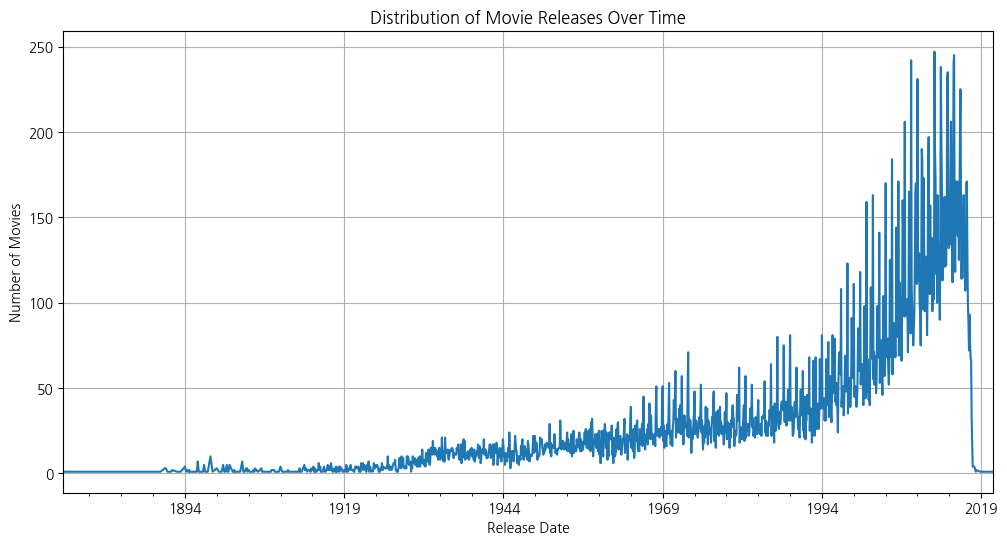

In [90]:
# 'release_date' 컬럼을 datetime 형식으로 변환
df['release_date'] = pd.to_datetime(df['release_date'])

# 개봉월 기준
release_date_counts = df['release_date'].dt.to_period('M').value_counts().sort_index()

# 시계열 데이터 분포를 시각화
plt.figure(figsize=(12, 6))
release_date_counts.plot(kind='line')
plt.title('Distribution of Movie Releases Over Time')
plt.xlabel('Release Date')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

### `runtime`

In [93]:
df = mvmd.copy()

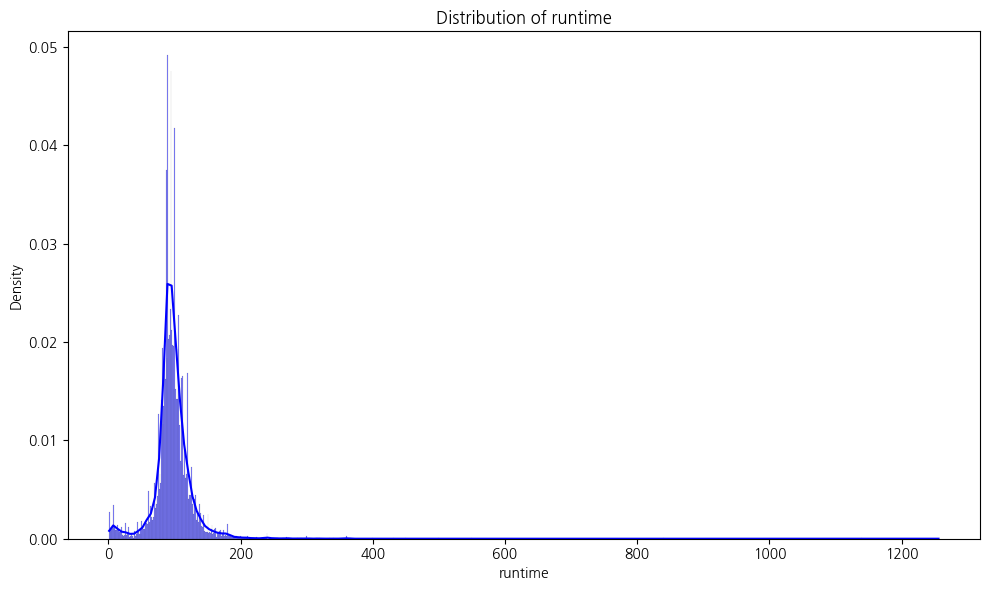

In [94]:
plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'], color='blue', kde=True, label='Runtime', stat='density', alpha=0.5)

plt.xlabel('runtime')
plt.title('Distribution of runtime')
plt.tight_layout()
plt.show()

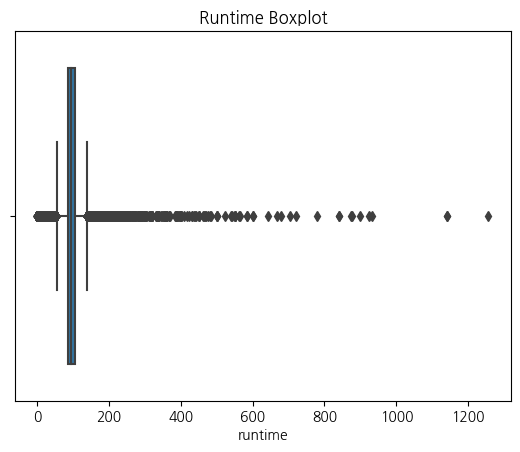

In [95]:
sns.boxplot(x=df['runtime'])
plt.title('Runtime Boxplot')
plt.show()

### `spoken_languages`

In [96]:
df = mvmd.copy()
df = df.dropna(subset='spoken_languages')
df = df.reset_index(drop=True)

In [97]:
ExtractValues(df,'spoken_languages','iso_639_1')

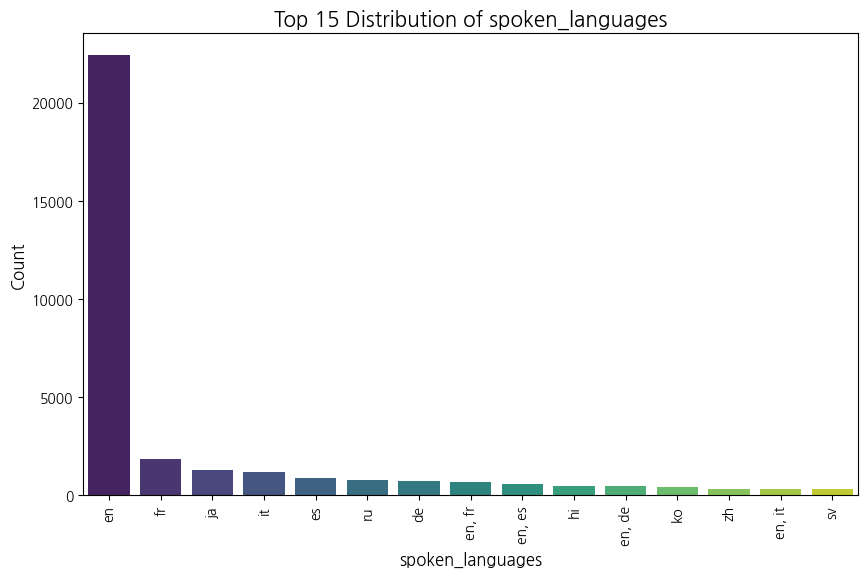

In [100]:
DistributionTopN(df,'spoken_languages')

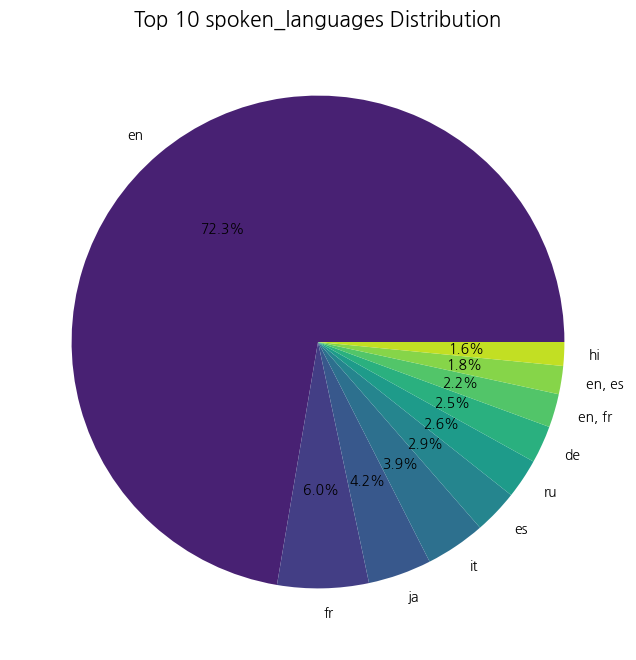

In [102]:
PiePlotTopN(df,'spoken_languages')

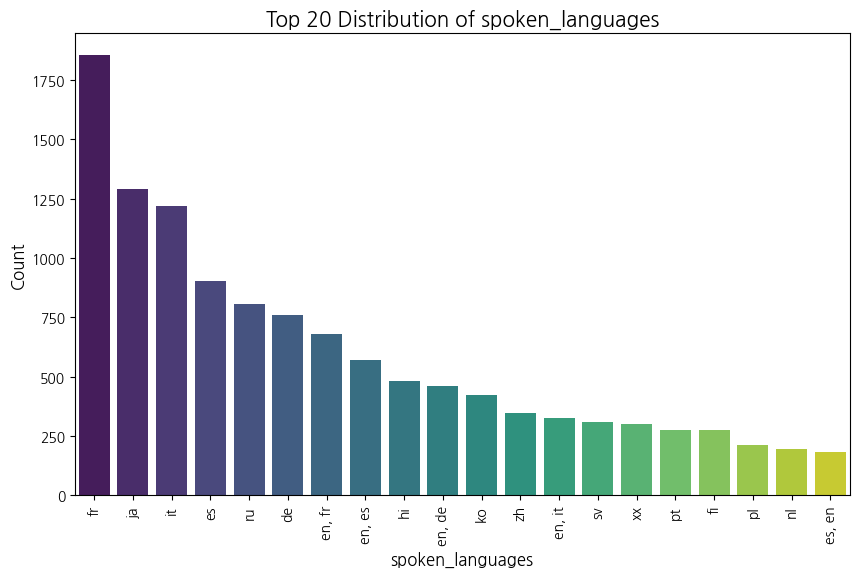

In [105]:
# 영어 제외
DistributionTopN(df[df['spoken_languages']!='en'],'spoken_languages',20)

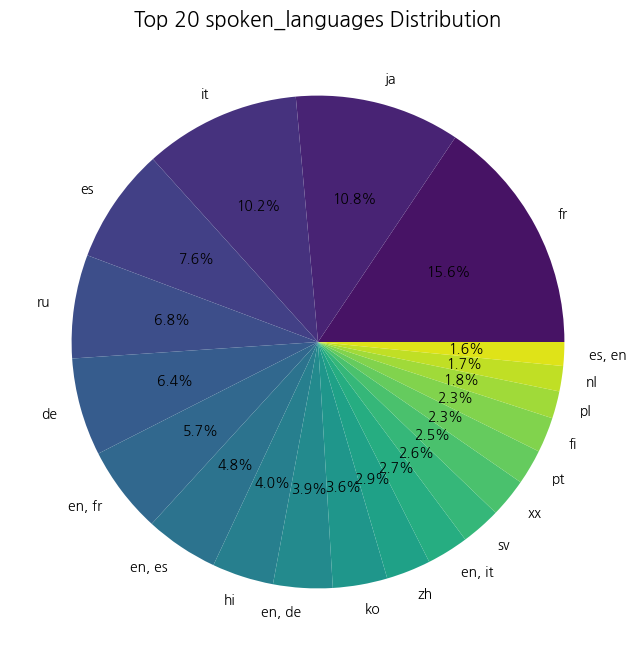

In [108]:
# 영어 제외
PiePlotTopN(df[df['spoken_languages']!='en'],'spoken_languages',20)

### `title`

In [109]:
df = mvmd.copy()
df = df.dropna(subset='title')
df = df.reset_index(drop=True)

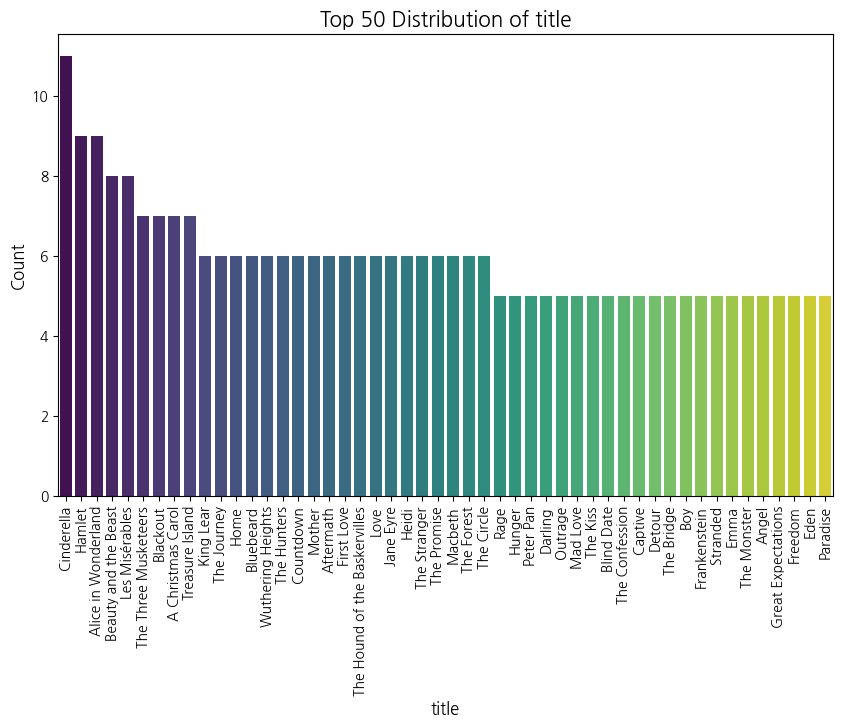

In [112]:
DistributionTopN(df,'title',50)

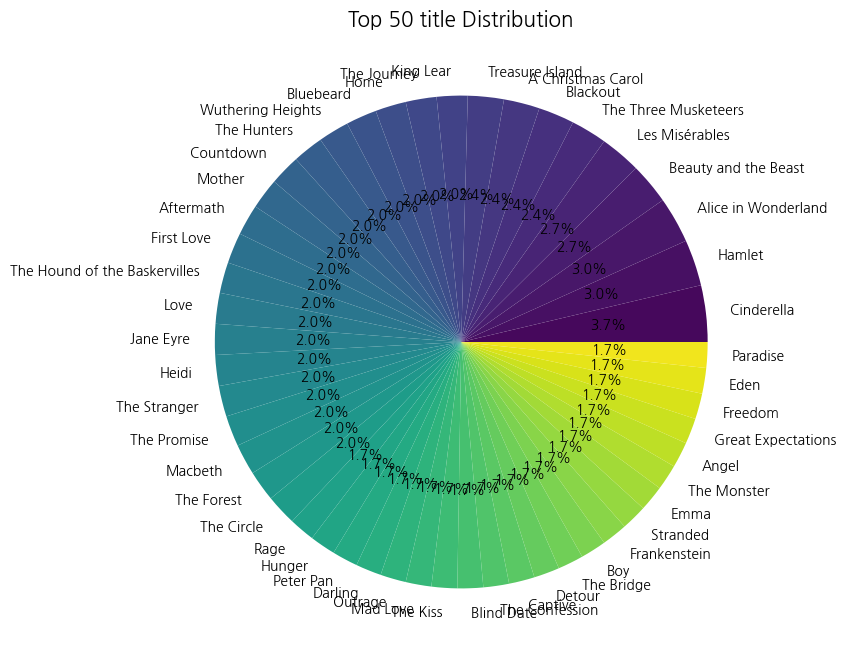

In [113]:
PiePlotTopN(df,'title',50)

### `vote_average`

In [115]:
df = mvmd.copy()

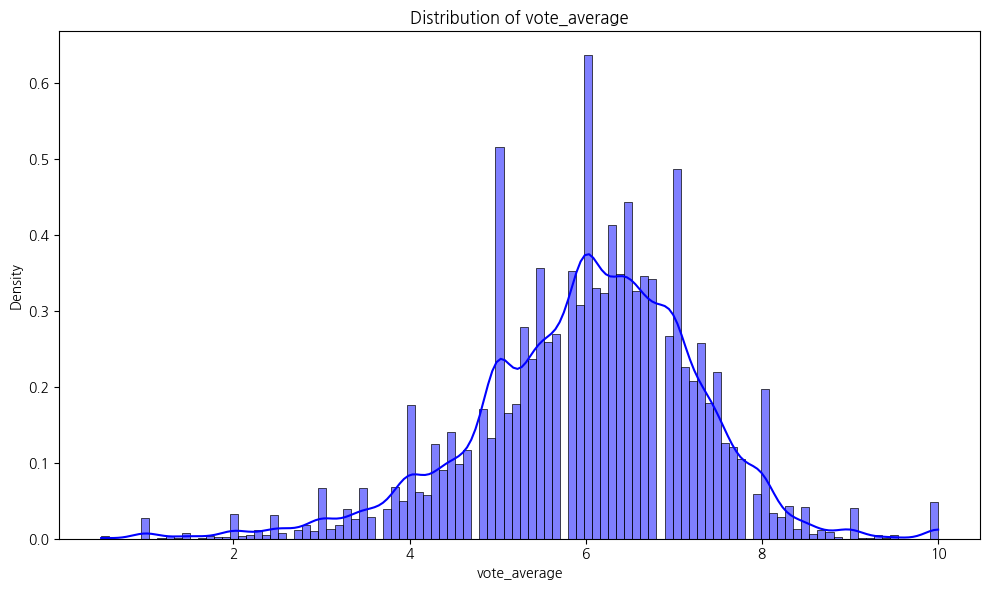

In [116]:
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], color='blue', kde=True, label='Vote Average', stat='density', alpha=0.5)

plt.xlabel('vote_average')
plt.title('Distribution of Vote Average')
plt.tight_layout()
plt.show()

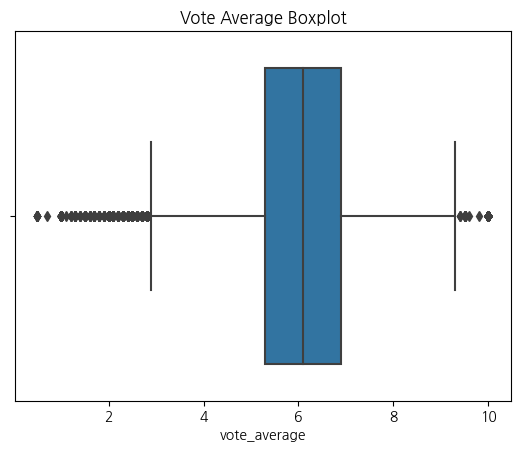

In [117]:
sns.boxplot(x=df['vote_average'])
plt.title('Vote Average Boxplot')
plt.show()

## 결측치 처리 후

### `genres`

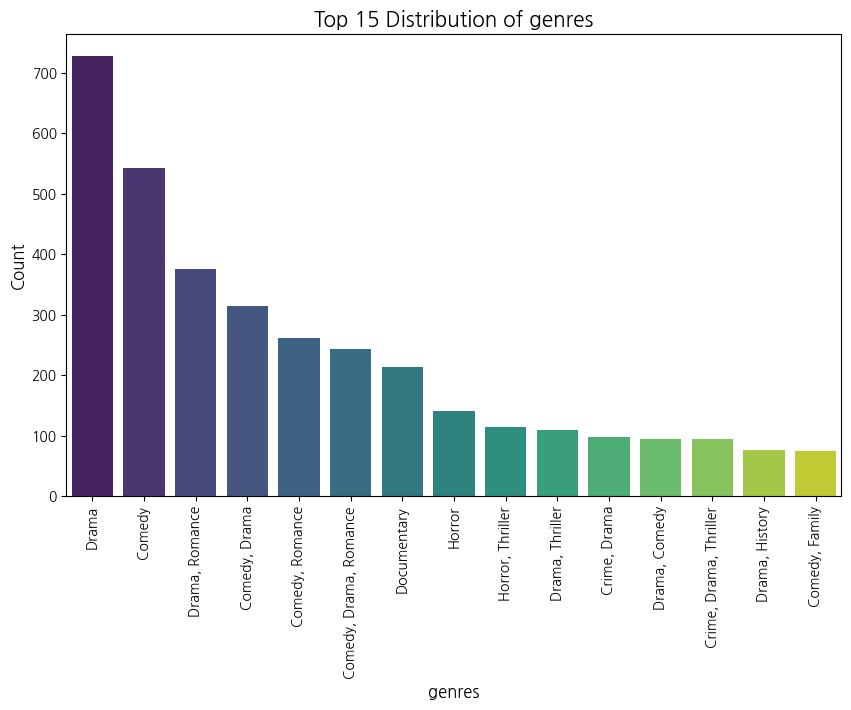

In [119]:
DistributionTopN(mvmd_cleaned,'genres',15)

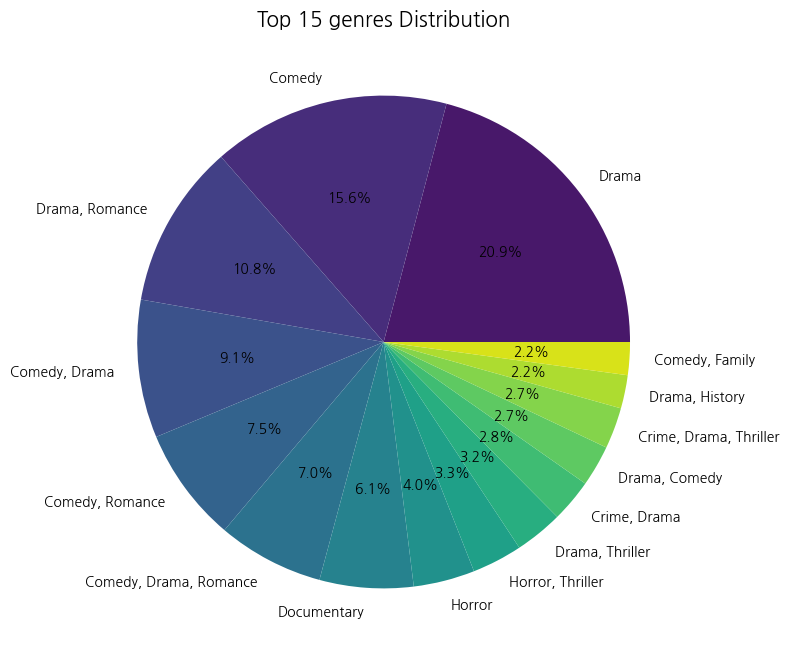

In [120]:
PiePlotTopN(mvmd_cleaned,'genres',15)

### `production_companies`

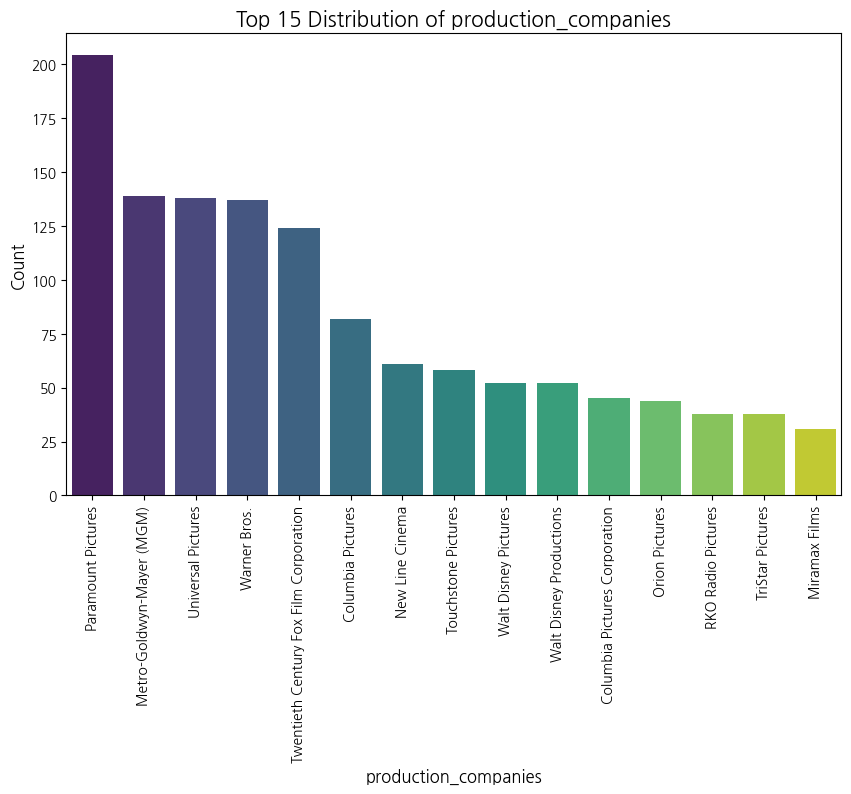

In [121]:
DistributionTopN(mvmd_cleaned,'production_companies',15)

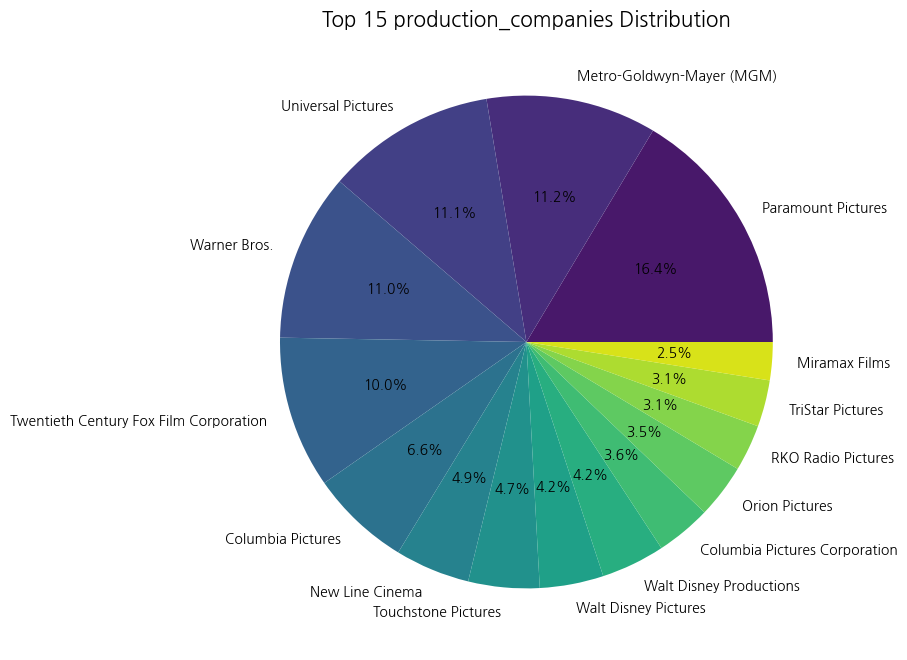

In [122]:
PiePlotTopN(mvmd_cleaned,'production_companies',15)

### `release_date`

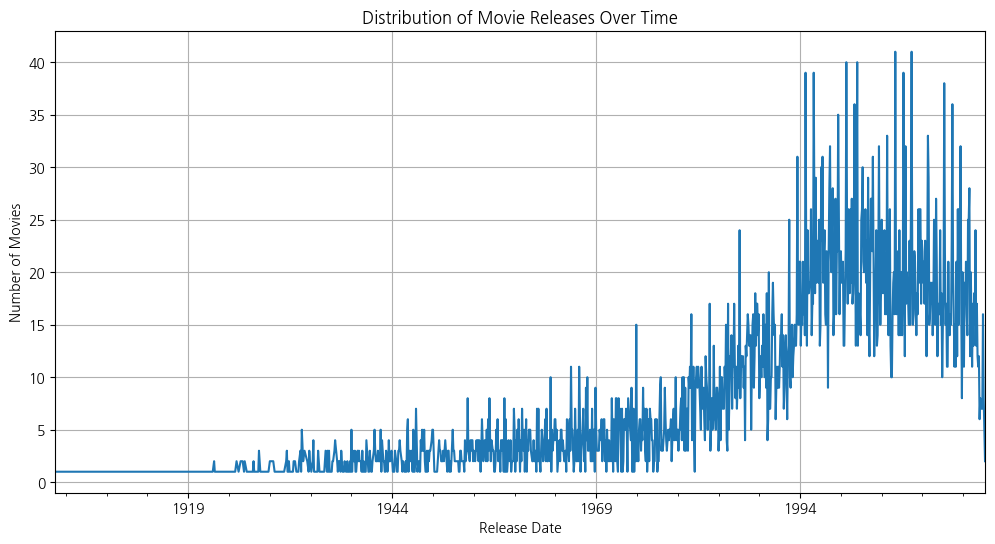

In [124]:
# 'release_date' 컬럼을 datetime 형식으로 변환
mvmd_cleaned['release_date'] = pd.to_datetime(mvmd_cleaned['release_date'])

# 개봉월 기준
release_date_counts = mvmd_cleaned['release_date'].dt.to_period('M').value_counts().sort_index()

# 시계열 데이터 분포를 시각화
plt.figure(figsize=(12, 6))
release_date_counts.plot(kind='line')
plt.title('Distribution of Movie Releases Over Time')
plt.xlabel('Release Date')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

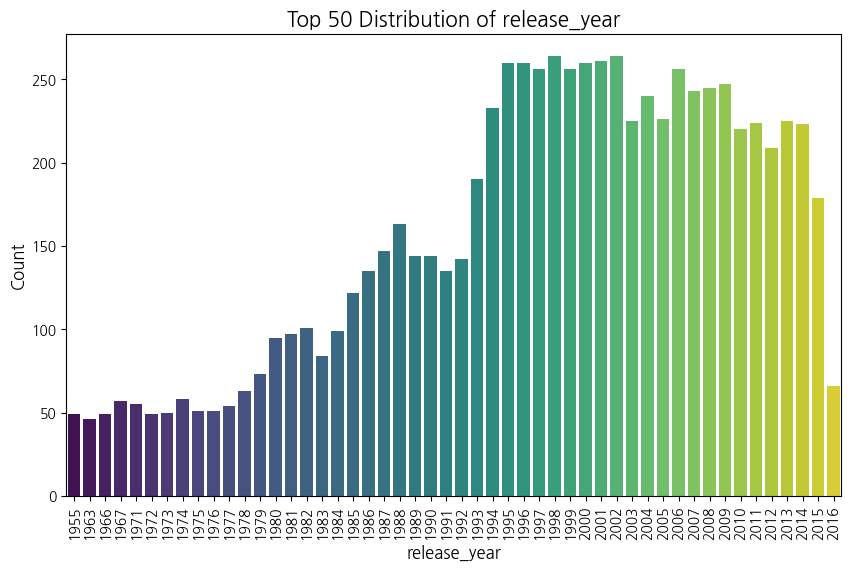

In [130]:
DistributionTopN(mvmd_cleaned,'release_year',50)

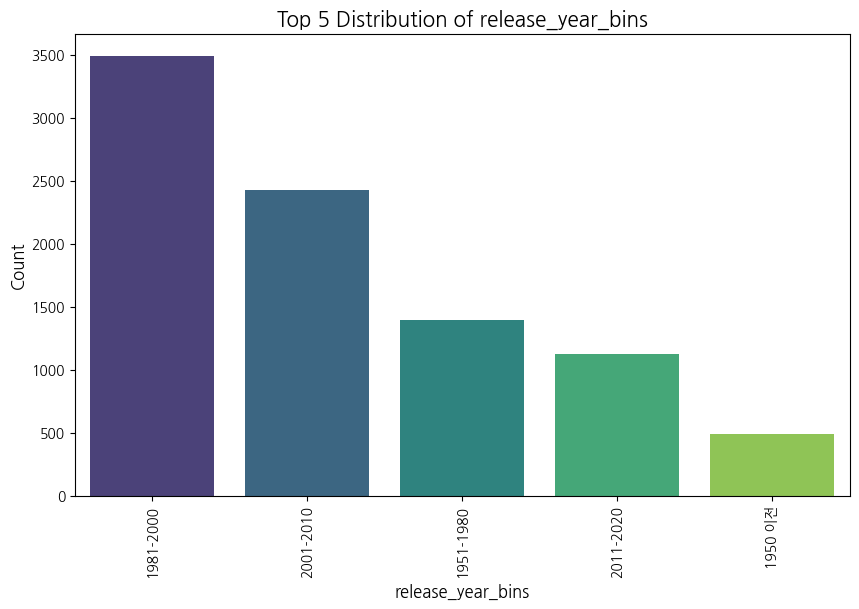

In [133]:
DistributionTopN(mvmd_cleaned,'release_year_bins',5)

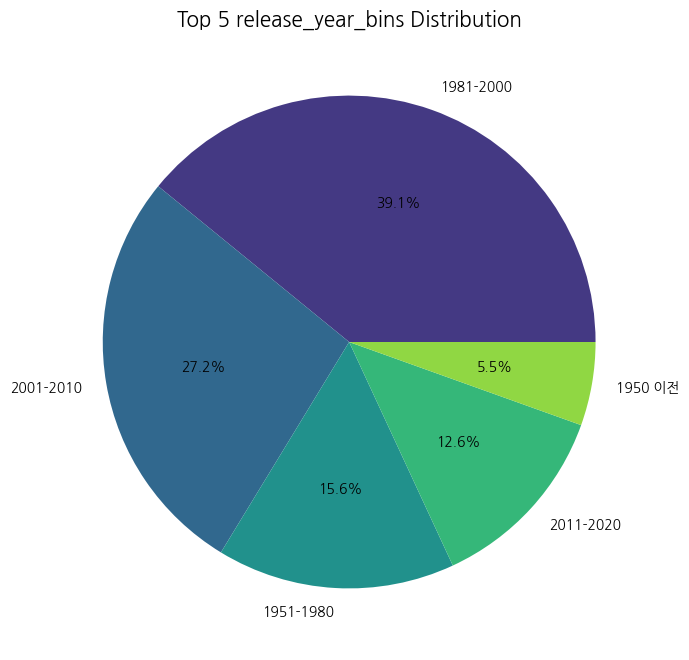

In [139]:
PiePlotTopN(mvmd_cleaned,'release_year_bins',5)

### `runtime`

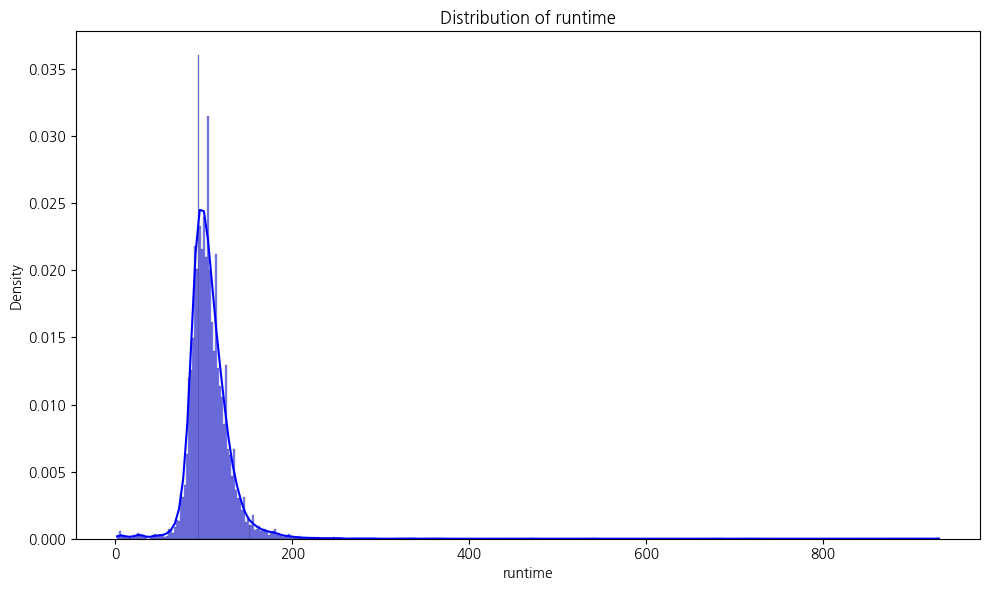

In [134]:
plt.figure(figsize=(10, 6))
sns.histplot(mvmd_cleaned['runtime'], color='blue', kde=True, label='Runtime', stat='density', alpha=0.5)

plt.xlabel('runtime')
plt.title('Distribution of runtime')
plt.tight_layout()
plt.show()

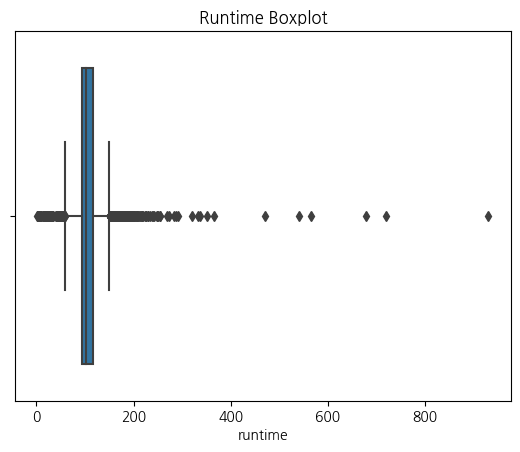

In [135]:
sns.boxplot(x=mvmd_cleaned['runtime'])
plt.title('Runtime Boxplot')
plt.show()

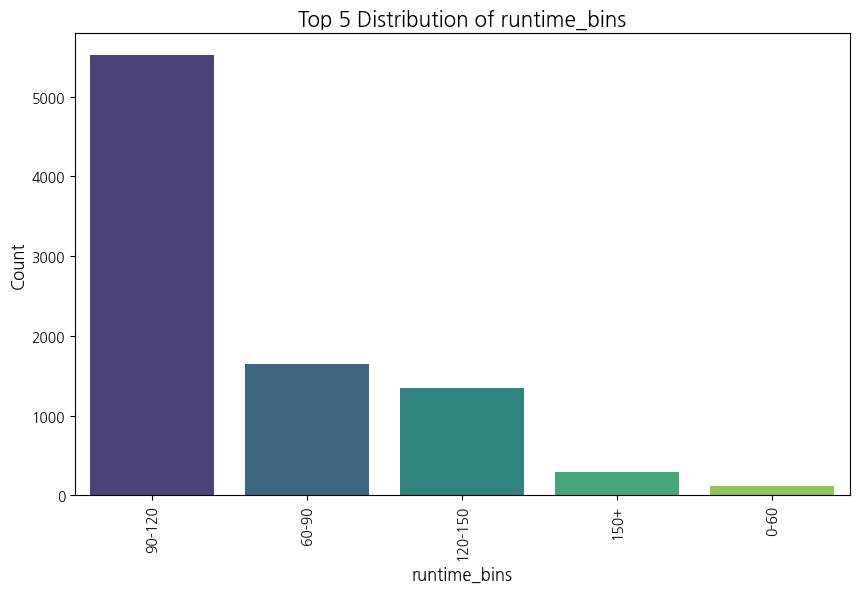

In [138]:
DistributionTopN(mvmd_cleaned,'runtime_bins',5)

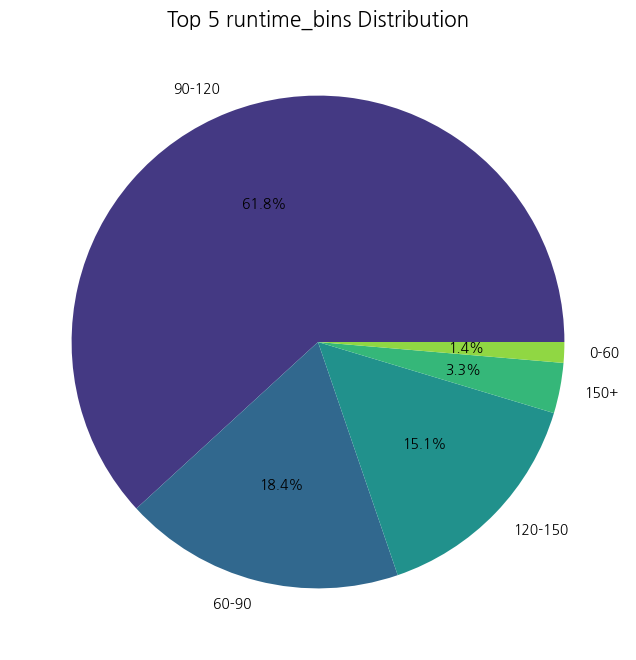

In [140]:
PiePlotTopN(mvmd_cleaned,'runtime_bins',5)

### `title`

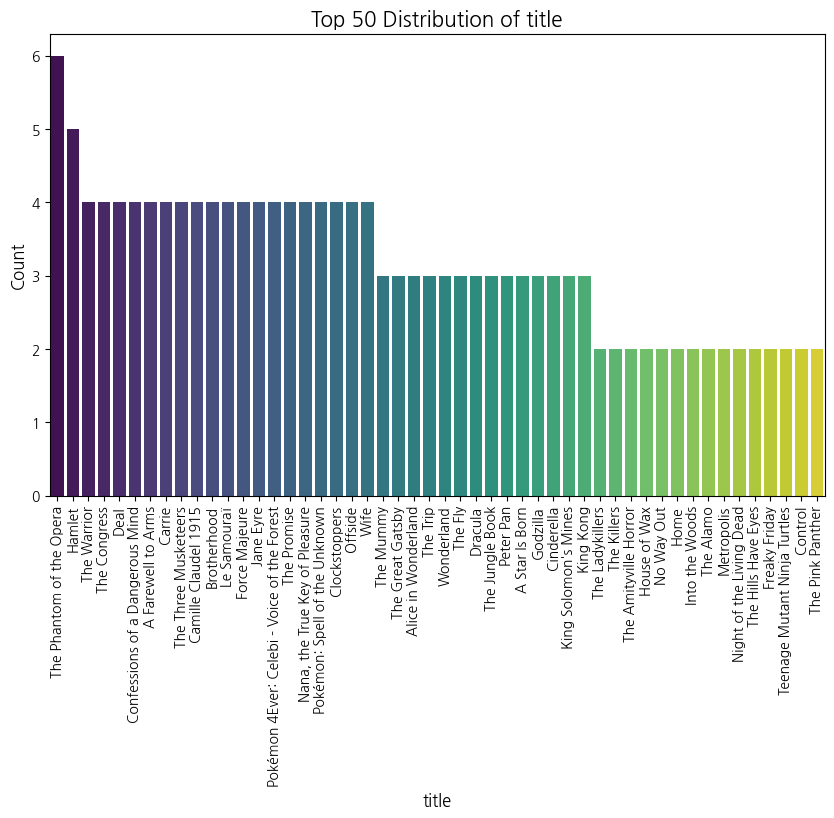

In [143]:
DistributionTopN(mvmd_cleaned,'title',50)

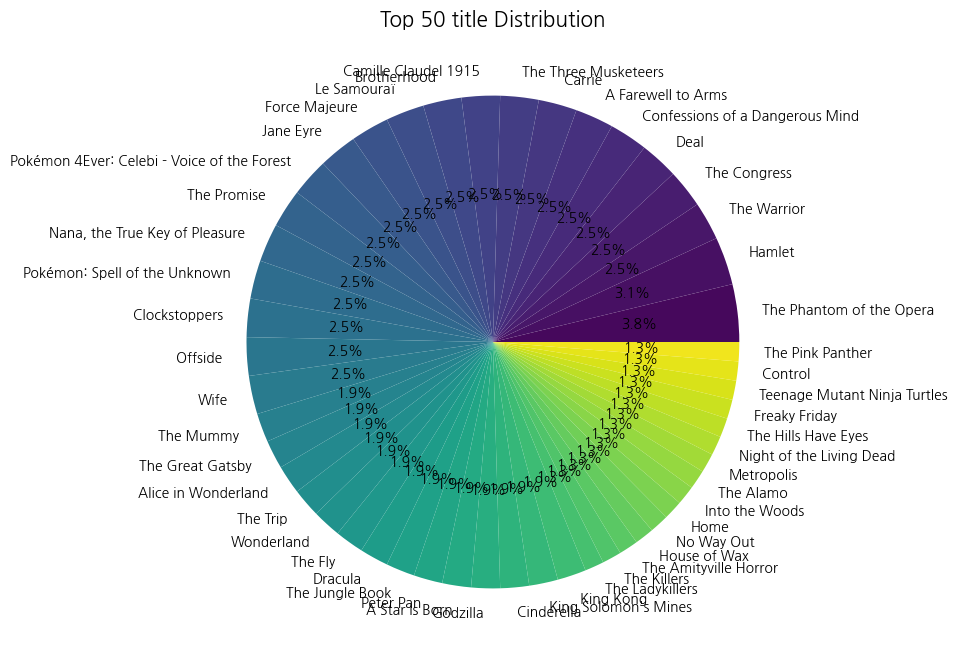

In [144]:
PiePlotTopN(mvmd_cleaned,'title',50)

### `vote_average`

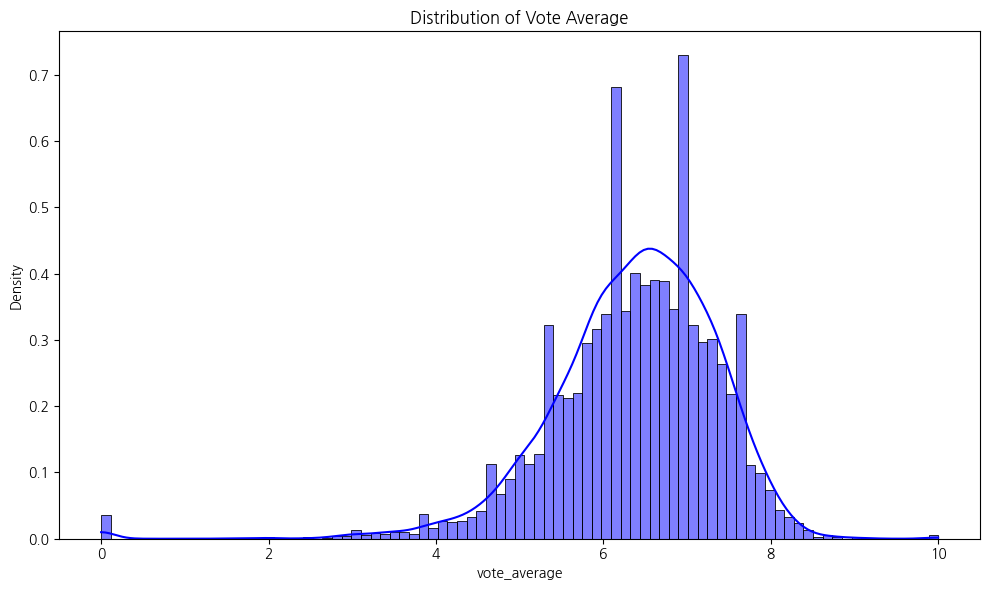

In [145]:
plt.figure(figsize=(10, 6))
sns.histplot(mvmd_cleaned['vote_average'], color='blue', kde=True, label='Vote Average', stat='density', alpha=0.5)

plt.xlabel('vote_average')
plt.title('Distribution of Vote Average')
plt.tight_layout()
plt.show()

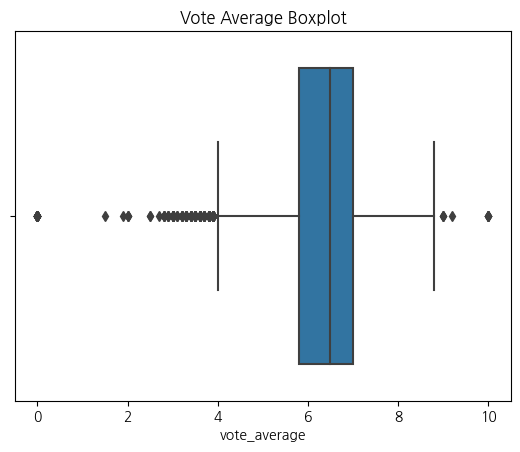

In [147]:
sns.boxplot(x=mvmd_cleaned['vote_average'])
plt.title('Vote Average Boxplot')
plt.show()